In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)




In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    max_iter=1000,
    C=1.0,
    l1_ratio=0,
    solver='saga'
)

logreg.fit(X_train_s, y_train)

y_predicted = logreg.predict(X_test_s)
y_probs = logreg.predict_proba(X_test_s)[:, 1]


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc=accuracy_score(y_test, y_predicted)
y_precise = precision=precision_score(y_test, y_predicted)
rec = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
(acc, y_precise, rec, f1)

(0.9824561403508771,
 0.9861111111111112,
 0.9861111111111112,
 0.9861111111111112)

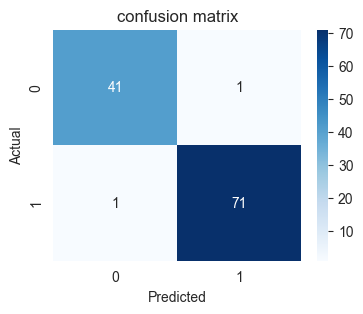

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns, matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
plt.ylabel('Actual'); plt.xlabel('Predicted')
plt.title("confusion matrix")
plt.show()

In [14]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_probs)
auc

0.9953703703703703

## notes
Dataset: sklearn breast cancer; Features: 30 numeric; Target: malignant vs benign.

Metrics: accuracy/precision/recall/F1 and AUC .

Takeaway: scaling + default logistic works well; note precision/recall tradeoff